# Chpater 06 **비지도학습** : 비슷한 과일끼리 모으자!

* 6장에서 공부할 내용

  1) target 변수가 없는 데이터를 위한 비지도학습

  2) 군집 알고리즘 k-means

  3) 데이터 차원 축소 알고리즘 주성분분석(PCA)



## 06-1 군집 알고리즘

### 1) 과일 사진 데이터 준비하기

아래와 같이 과일 사진 데이터(`fruits_300_data`)를 다운로드하자. 여기서 `wget`은 파이썬 외부의 운영체제 명령어로서 웹에 있는 데이터를 다운로드할 때 이용할 수 있다. `-O` 다음에는 저장할 파일 이름을 지정한다. 여기서는 다운로드한 데이터를 `fruits_300.npy`라는 이름으로 현재 작업 폴더에 저장한다.

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-02-01 11:06:44--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-02-01 11:06:44--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-02-01 11:06:45--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

파일 이름에 확장자 `npy`를 붙인 것은 넘파이에서 저장한 파일이기 때문이다.

In [3]:
import numpy as np

ar1 = np.arange(20).reshape(4, 5)
ar1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

`np.save()`를 이용하면 아래와 같이 넘파이 배열 `ar1`을 지정한 이름으로(`ar1_file`) 저장할 수 있다. 결과를 코랩의 왼쪽 파일 탭으로 확인해보자. 파일 확장자가 자동으로 `npy`라고 붙었다.

In [5]:
np.save("ar1_file", ar1)



그런데 이 파일은 binary file이므로 파이썬 바깥에서 editor를 이용하여 볼 수는 없다. 내용을 보려면 `np.load()` 이용.

In [6]:
np.load('ar1_file.npy')

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

같은 방법으로 과일 사진 데이터가 있는 `fruits_300.npy` 파일을 불러와서 배열 `fruits`로 만들자.

In [7]:
data = np.load('fruits_300.npy')

In [8]:
type(data)

numpy.ndarray

In [10]:
data.shape

(300, 100, 100)

In [11]:
data.ndim

3

3차원 배열 `fruits`에는 높이와 너비가 각각 100개인 100 x 100 이미지가 모두 300개 있다. 따라서 각 이미지의 픽셀 수는 1만개다.

`fruits`에 있는 첫번째 이미지의 첫번째 행만 출력해보자. 이미지가 흑백이며 (컬러라면 차원이 하나 더 필요하다) 값들의 범위는 0~255 사이( $2^8 = 256$ 가지)다.

In [12]:
data[0,0,:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

300개 가운데 맨 첫번째 이미지를 출력하기 위해 `matplotlib`의 `imshow()`를 이용하자. `cmap=`옵션으로 색을 지정할 수 있는데 흑백이미지이므로 회색으로 지정하자(생략 가능).

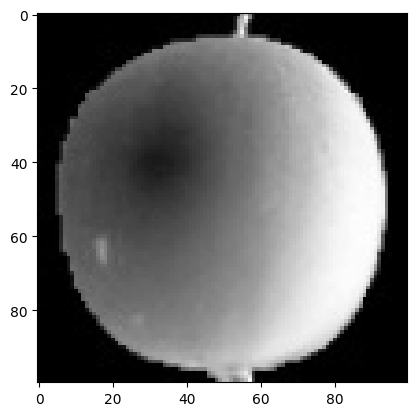

In [16]:
import matplotlib.pyplot as plt

plt.imshow(data[0],cmap='gray')

`cmap`을 지정하지 않으면? 컬러 그림이 나온다. 그런데 원본이 흑백인 이미지 파일을 굳이 컬러로 출력할 필요는 없겠다.

무슨 과일처럼 보이는가? 사과? 오렌지? `cmap = gray_r`로 지정하면 흑백을 반전시킬 수 있다.

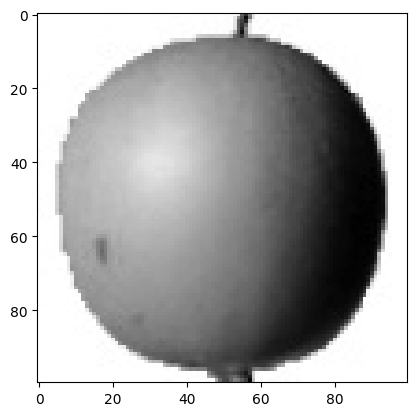

In [20]:
plt.imshow(data[0], cmap='gray_r')

중간 부분의 한 행과 한 열에 해당하는 데이터를 살펴보자.

In [21]:
data[0, 50,  :]

array([  5,   1,   1,   3,   2,  45,  84,  78,  76,  74,  76,  75,  74,
        75,  72,  67,  65,  65,  64,  63,  62,  60,  59,  62,  58,  55,
        54,  54,  53,  52,  50,  49,  51,  52,  53,  53,  54,  56,  59,
        62,  65,  67,  71,  74,  76,  79,  83,  86,  90,  94,  97,  99,
       102, 105, 108, 112, 115, 120, 124, 127, 133, 138, 143, 149, 155,
       156, 157, 162, 170, 174, 175, 176, 181, 187, 194, 201, 204, 206,
       210, 216, 222, 225, 228, 232, 234, 236, 237, 237, 237, 235, 237,
       238, 234, 229, 114,   1,   1,   1,   1,   1], dtype=uint8)

In [22]:
data[0, :, 50]

array([  2,   2,   3,   2,   3,   4,  57, 132, 131, 127, 121, 115, 113,
       112, 111, 110, 105, 101,  98,  94,  91,  92,  94,  92,  93,  92,
        90,  89,  90,  90,  88,  86,  85,  86,  87,  87,  85,  85,  87,
        88,  85,  86,  87,  87,  89,  89,  91,  92,  93,  95,  97,  98,
       100, 101, 103, 104, 108, 108, 108, 109, 111, 112, 114, 115, 116,
       116, 117, 118, 120, 122, 124, 125, 125, 126, 127, 129, 130, 132,
       133, 135, 134, 139, 144, 149, 151, 153, 155, 159, 162, 164, 168,
       174, 177, 182, 180, 172, 170, 176, 171, 172], dtype=uint8)

이미지 출력과 데이터를 비교해서 살펴보면 숫자 값이 작은 픽셀 위치는 밝게, 큰 픽셀은 짙게 나온 것을 알 수 있다.

0번에 이어 100, 200번 과일 이미지도 출력해보자. 파인애플과 바나나로 보인다. 사실 이 데이터에는 사과(0\~99), 파인애플(100\~199), 바나나(200\~299)가 순서대로 각각 100개씩 들어있다(즉 사실상 target 값을 알고 있으므로 비지도학습에 적절한 데이터는 아니다).

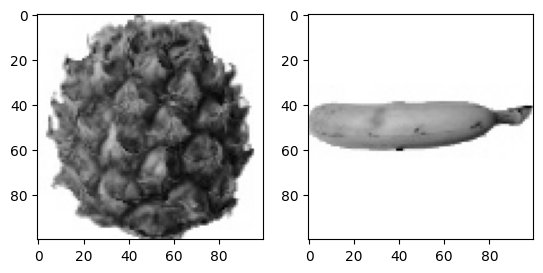

In [26]:
import matplotlib.pyplot as plt

fig,axs=plt.subplots(1,2)
axs[0].imshow(data[100],cmap='gray_r')
axs[1].imshow(data[200],cmap='gray_r')

### 2) 픽셀 값 분석하기

과일별로 1만개 픽셀의 값을 분석하기 위해 세 가지 과일 종류별로 2차원 이미지 배열(100 x 100)을 길이가 10,000인 1차원 배열로 바꾸자.

In [45]:
a=data[:100].reshape(-1,100**2)
p=data[100:200].reshape(-1,100**2)
b=data[200:].reshape(-1,100**2)

print(a.shape,b.shape,p.shape)

(100, 10000) (100, 10000) (100, 10000)


가령 각 사과의 픽셀 값 평균을 구하고 싶다면 평균을 계산하는 함수 `mean()`에 `axis = 1`을 덧붙이면 된다(293쪽 설명 참조).

In [46]:
np.mean(a,axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

세 가지 과일 종류별로 픽셀 값 평균(각각 100개씩)을 히스토그램으로 그려서 비교해보자.

아래 코드에서 `legend()`는 그림 순서대로 범례를 지정한다.

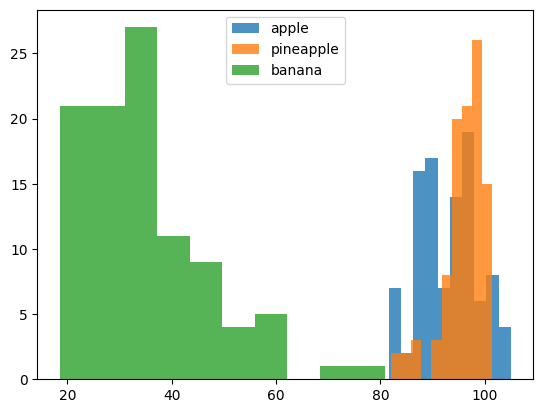

In [47]:
import matplotlib.pyplot as plt

plt.hist(np.mean(a,axis=1),alpha=0.8)
plt.hist(np.mean(p,axis=1),alpha=0.8)
plt.hist(np.mean(b,axis=1),alpha=0.8)

plt.legend(['apple','pineapple','banana'])

사과와 파인애플의 픽셀 평균은 겹치는 부분이 많지만 바나나는 그렇지 않다(* **퀴즈 : 왜 그럴까?**). 즉 과일의 이미지를 출력할 필요없이 픽셀 평균값만으로 바나나임을 알 수 있겠다. 하지만 픽셀 평균값을 이용해서 사과와 파인애플을 구분할 수는 없을 것같다.

사과와 파인애플을 픽셀 데이터를 가지고 구분할 길은 없을까?
두 과일은 생김새가 다르므로 픽셀 위치에 따라 음영이 달라질 것이다. 그렇다면 과일별 평균 대신 픽셀별 평균을 비교해보자. 데이터가 1만개나 되므로 히스토그램대신 막대그림(bar chart)을 이용해보자.

Text(0.5, 1.0, 'banana')

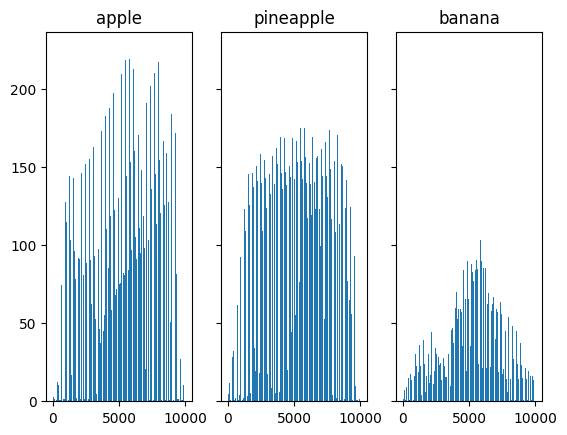

In [69]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].bar(range(10000), np.mean(a, axis=0))
axs[1].bar(range(10000), np.mean(p, axis=0))
axs[2].bar(range(10000), np.mean(b, axis=0))

axs[0].set_title('apple')
axs[1].set_title('pineapple')
axs[2].set_title('banana')

교재 296쪽의 설명을 참조해서 세 그림을 비교해보라.

100 x 100 개 픽셀마다 평균값을 가지고 그림을 그려보자.

In [63]:
am = np.mean(a, axis=0).reshape(100, 100)
pm = np.mean(p, axis=0).reshape(100, 100)
bm = np.mean(b, axis=0).reshape(100, 100)

위에서 만든 세 배열은 각각 100x100 2차원 배열이다.

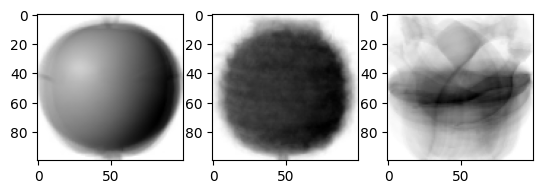

In [67]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3)
axs[0].imshow(am, cmap='gray_r')
axs[1].imshow(pm, cmap='gray_r')
axs[2].imshow(bm, cmap='gray_r')

### 3) 평균값과 가까운 사진 고르기

이제 위에서 만든 세 개의 2차원 배열과 300개의 과일 이미지 데이터를 비교하면 그 과일이 어떤 종류인지 알 수 있지 않을까? 사과를 예로 들어 알아보자.

아래에서 `fruits`는 300x100x100 3차원 배열이고 `apple_mean`은 100x100 2차원 배열이다. 차원이 다른데도 뺄셈이 가능한 이유는? 2장(100쪽)에서 공부한 **broadcasting** 때문.

In [89]:
abs_diff = np.abs(data - am)
abs_mean = np.mean(abs_diff, axis=(1,2))
abs_mean.shape

(300,)

차이가 작은 과일 100개를 그려보자. 그림에 x,y 좌표축이 없는 이유는 `axis('off')`라고 지정하였기 때문이다.

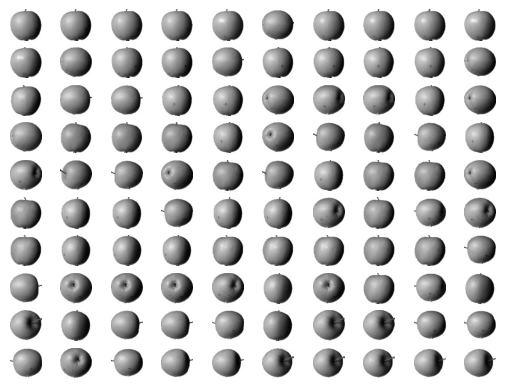

In [90]:
import matplotlib.pyplot as plt

ai = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10)

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(data[ai[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off') #눈금제거

교재 298쪽의 설명을 보고 **군집, 클러스터**라는 용어를 공부하자.

## 확인문제

2번 문제: 위의 방법을 이용하면 바나나도 사과처럼 잘 찾아낼까?

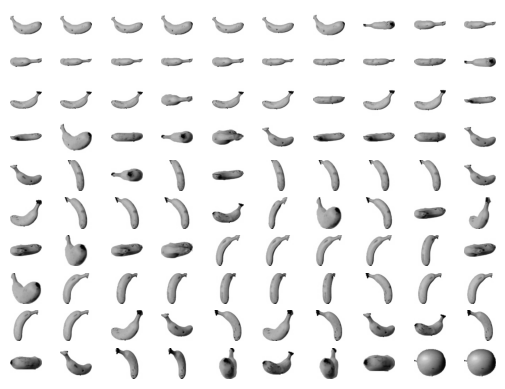

In [91]:
abs_diff = np.abs(data - bm)
abs_mean = np.mean(abs_diff, axis=(1,2))

bi = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10)

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(data[bi[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')

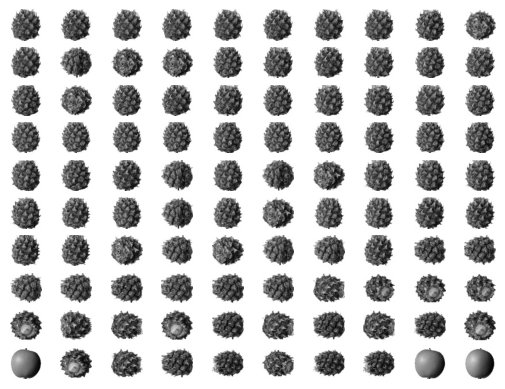

In [92]:
abs_diff = np.abs(data - pm)
abs_mean = np.mean(abs_diff, axis=(1,2))

pi = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10)

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(data[pi[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')